In [2]:
#Module Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load DataSet into a DataFrame
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: >

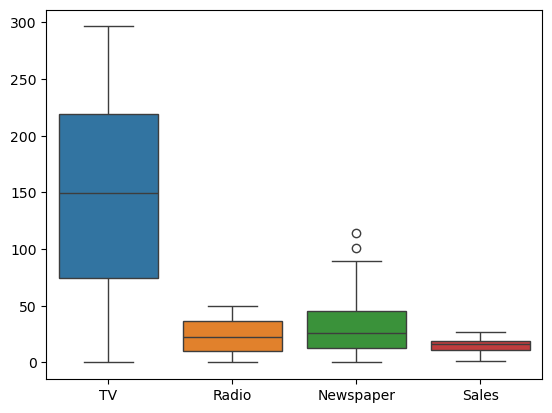

In [ ]:
#Visualise the Data
sns.boxplot(df)


In [5]:
#Split into input and output labels
x=np.array(df.drop('Sales',axis=1))
y=np.array(df['Sales'])

In [6]:
#Make the x into a coloumn matrix
x=x.T

In [7]:
#Normalise the DataSet
#x=(x-mean)/std
means_x=np.mean(x,axis=1,keepdims=True)
means_y=np.mean(y,keepdims=True)
std_x=np.std(x,axis=1,keepdims=True)
std_y=np.std(y,keepdims=True)
x=(x-means_x)/std_x
y=(y-means_y)/std_y

In [8]:
#Add the Bias Parameter as the first row
x=np.insert(x,0,np.ones(x.shape[1]),axis=0)

In [9]:
#Loss Function
def J(x,y,w):
  y_pred=w.T@x
  loss=0.5*(np.sum((y-y_pred)**2))
  return loss

In [10]:
#Online Gradient Descent Function
def online_gradient(x,y,w,lr=0.01):
  y_pred=np.dot(w,x)
  grad=-(y-y_pred)
  w=w-lr*(grad*x)
  return w



In [11]:
#Initialise the Weights for Online Gradient Descent
w=[]
lr=[]
i=0.1
for _ in range(4):
  w.append(np.zeros(x.shape[0]))
  lr.append(i)
  i=i/10

[ 0.11948734  0.8400625   0.36434965 -0.02008498]
[0.00366199 0.77576422 0.27369456 0.02801659]
[0.00020096 0.16328404 0.06223133 0.02563491]
[2.44210269e-06 1.78442332e-02 6.90989553e-03 3.09426662e-03]


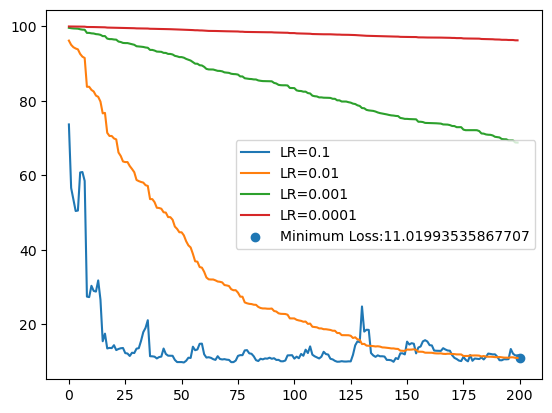

In [12]:
min_loss=1e100
for i in range(len(w)):
  loss_vals=[]
  xtemp=[]
  ytemp=[]
  for _ in range(len(y)):
    w[i]=online_gradient(x[:,_],y[_],w[i],lr[i])
    loss=J(x,y,w[i])
    loss_vals.append(loss)
  print(w[i])
  min_loss=min(min_loss,loss_vals[-1])
  plt.plot(loss_vals,label=f'LR={lr[i]}')
plt.scatter(200,min_loss,label=f"Minimum Loss:{min_loss}")
plt.legend()
plt.show()

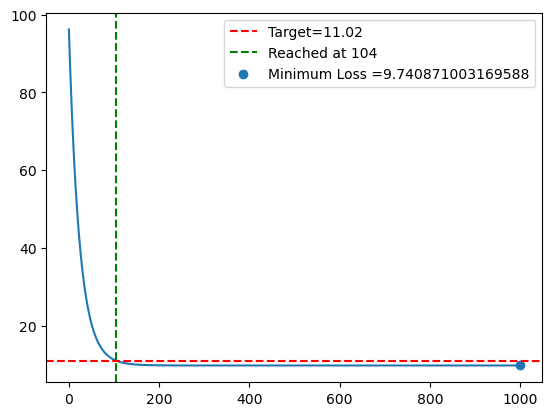

9.740871003169588


In [34]:
#Batch Gradient Descent
weights=np.zeros(x.shape[0])
lr=0.0001
target=11.02
loss_vals=[]
epochs=1000
for _ in range(epochs):
  y_pred=weights.T@x
  grad=-(x@(y-y_pred).T)
  weights=weights-lr*grad
  loss_vals.append(J(x,y,weights))
cross_index = next((i for i, loss in enumerate(loss_vals) if loss <= target), None)
plt.plot(loss_vals)
plt.axhline(y=target, color='red', linestyle='--', label=f"Target={target}")
if cross_index is not None:
    plt.axvline(x=cross_index, color='green', linestyle='--', label=f"Reached at {cross_index}")
plt.scatter(999,loss_vals[-1],label=f"Minimum Loss ={loss_vals[-1]}")
plt.legend()
plt.show()
print(loss_vals[-1])